# Diabetes Disease Prediction

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Data Extraction

In [2]:
df_dataset = pd.read_csv('DiabetesTrain.csv')
df_dataset.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [3]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [4]:
#rename kolom - kolom agar tidak terlalu panjang 
df_dataset = df_dataset.rename(columns = {'no_times_pregnant' : 'total_pregnant',
                                         'glucose_concentration' : 'glucose',
                                         'blood_pressure' : 'bp',
                                         'skin_fold_thickness' : 'skin',
                                         'serum_insulin' : 'insulin',
                                         'diabetes_pedigree' : 'pedigree',
                                         'diabetes' : 'label'})
df_dataset

,p_id,total_pregnant,glucose,bp,skin,insulin,bmi,diabetes pedigree,age,label
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


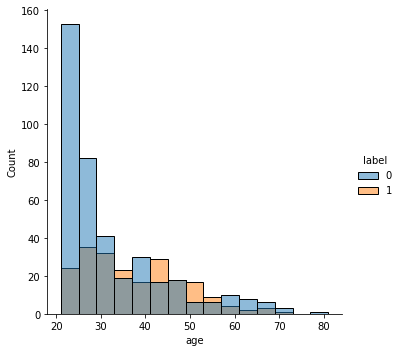

In [5]:
#melihat pembagian data, untuk membagi yang diabetes dan yang tidak
sns.displot(df_dataset, x = 'age', hue = 'label')

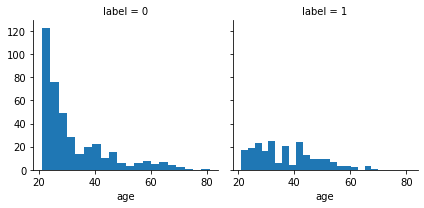

In [6]:
#membagi dua grid, berdasarkan label
g = sns.FacetGrid(df_dataset, col = 'label')

#menampilkan dr seaborn dengan plt.hist, parameter age, measurement bins
g.map(plt.hist, 'age', bins = 20)

In [7]:
groupby_age = df_dataset.groupby(['label'])['age'].mean()
groupby_age

label
0    31.392500
1    36.939252
Name: age, dtype: float64

In [8]:
groupby_bmi = df_dataset.groupby(['label'])['bmi'].mean()
groupby_bmi

label
0    30.299000
1    34.921028
Name: bmi, dtype: float64

In [9]:
df_dataset1 = df_dataset.drop('p_id', 1)
df_dataset1.head()

,total_pregnant,glucose,bp,skin,insulin,bmi,diabetes pedigree,age,label
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


## Decision Tree Model

In [10]:
#input variabel x dengan drop label, karena label untuk y (dependen)
x = df_dataset1.drop('label', 1)

#input variabel y dengan kolom label
y = df_dataset1['label'].astype('category')

In [11]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 8)
(429,)
(185, 8)
(185,)


In [12]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
%time clf.fit(X_train, y_train)

Wall time: 2 ms


DecisionTreeClassifier(max_depth=3)

In [13]:
#implementasikan ke data testing
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

Text(83.40000000000006, 0.5, 'predicted label')

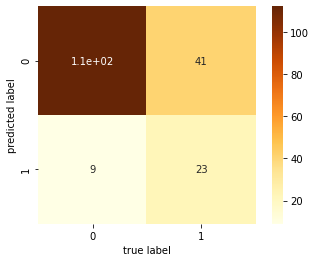

In [14]:
#confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, cmap = 'YlOrBr')
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(83.40000000000006, 0.5, 'predicted label')

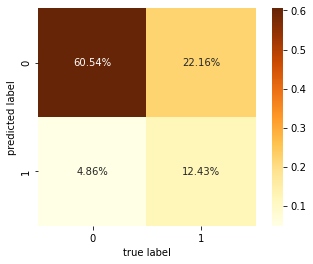

In [15]:
#ganti label di dalam kotak dengan percentage
sns.heatmap(mat.T/np.sum(mat.T), square = True, annot = True, fmt = '.2%', cbar = True, cmap = 'YlOrBr')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [16]:
#lihat akurasi 
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7297297297297297


## Challenge

In [17]:
df_set = pd.read_csv('DiabetesSet.csv')
df_set.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [18]:
prediction = pd.DataFrame({'Prediction' : y_pred})
prediction.head()

,Prediction
0,0
1,1
2,0
3,0
4,0


In [19]:
#result
join = [df_set, prediction]
result = pd.concat(join, axis = True)
result.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,Prediction
0,437.0,12.0,140.0,85.0,33.0,0.0,37.4,0.244,41.0,0
1,411.0,6.0,102.0,90.0,39.0,0.0,35.7,0.674,28.0,1
2,639.0,7.0,97.0,76.0,32.0,91.0,40.9,0.871,32.0,0
3,213.0,7.0,179.0,95.0,31.0,0.0,34.2,0.164,60.0,0
4,181.0,6.0,87.0,80.0,0.0,0.0,23.2,0.084,32.0,0


## Export to CSV

In [20]:
result.to_csv('result_diabetes_classification.csv')